# Used Car Price Prediction

## 1) Problem statement.

* This dataset comprises used cars sold on cardehko.com in India as well as important features of these cars.
* If user can predict the price of the car based on input features.
* Prediction results can be used to give new seller the price suggestion based on market condition.

## 2) Data Collection.
* The Dataset is collected from scrapping from cardheko webiste
* The data consists of 13 column and 15411 rows.

## Importing the Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #الانذارات يوقفها

warnings.filterwarnings("ignore")



## Reading the data


In [3]:
df = pd.read_csv("cardekho_imputated.csv", index_col=[0])

In [4]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


## Data Cleaning


### Handling Missing values

* Handling Missing values
* Handling Duplicates
* Check data type
* Understand the dataset

In [11]:
## Check Null Values
##Check features with nan value
df.isnull().sum()

,0
model,0
vehicle_age,0
km_driven,0
seller_type,0
fuel_type,0
transmission_type,0
mileage,0
engine,0
max_power,0
seats,0


### Drop useless columns

In [14]:
print(df.columns)

Index(['model', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type',
       'transmission_type', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price'],
      dtype='object')


In [15]:
df.drop('car_name', axis=1, inplace=True, errors='ignore')
df.drop('brand', axis=1, inplace=True, errors='ignore')

In [16]:
## Remove Unnecessary Columns
##df.drop('car_name', axis=1, inplace=True)
##df.drop('brand', axis=1, inplace=True)

In [17]:
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


### Dealing with Duplicates

Check if there are duplicates in the dataset:

In [18]:

#check if there are duplicates in the dataset:
df.duplicated().sum()



0

In [19]:
#drop the duplicates:
df.drop_duplicates(inplace=True)


## Data Analysis

In [20]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15244.000000,1.524400e+04,15244.000000,15244.000000,15244.000000,15244.000000,1.524400e+04
mean,6.041131,5.563958e+04,19.697333,1486.171543,100.607652,5.326161,7.747014e+05
std,3.016228,5.176630e+04,4.169307,520.419390,42.915687,0.808760,8.946761e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.590000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [21]:
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


#### Univariate Visualization

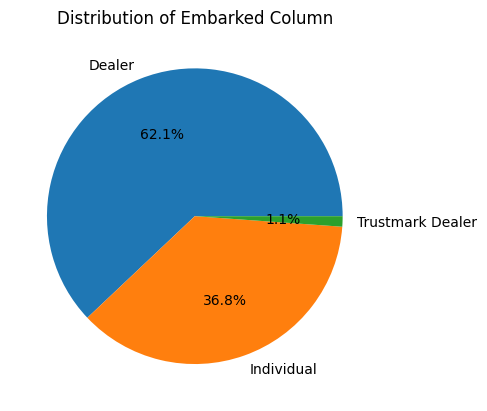

In [22]:
model_counts = df['seller_type'].value_counts()

plt.pie(model_counts, labels=model_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Embarked Column')
plt.show()

<Axes: xlabel='transmission_type', ylabel='count'>

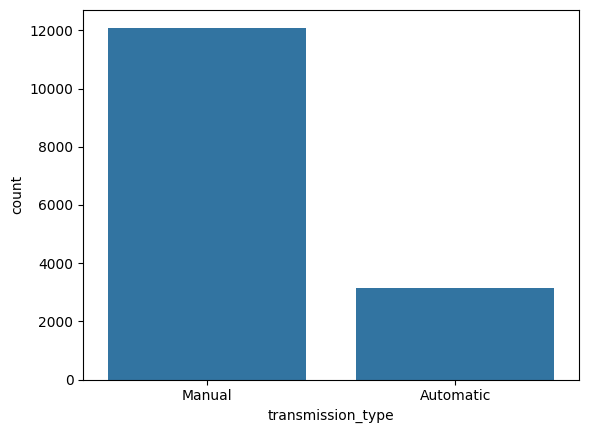

In [23]:
sns.countplot(x='transmission_type', data=df)

<Axes: xlabel='fuel_type', ylabel='count'>

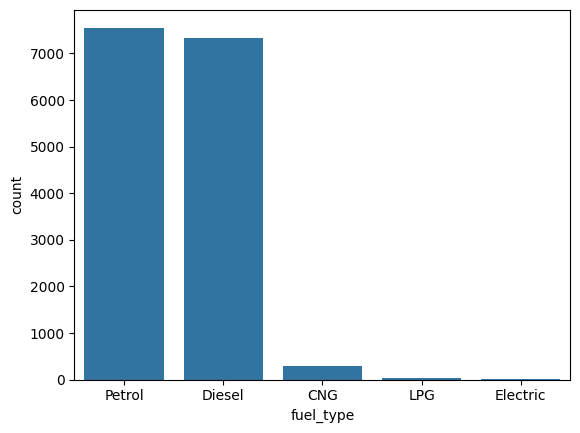

In [24]:
sns.countplot(x='fuel_type', data=df)

<Axes: xlabel='vehicle_age', ylabel='Count'>

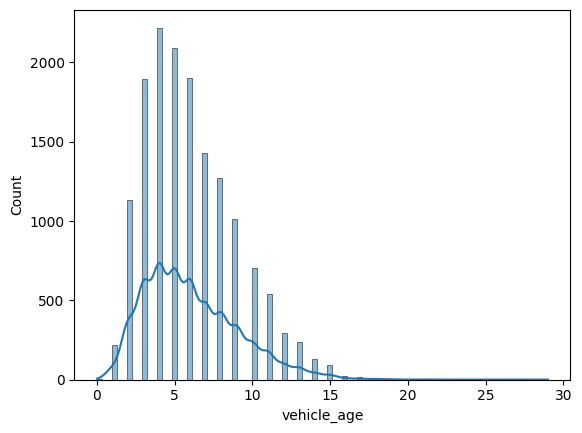

In [25]:
sns.histplot( x=df['vehicle_age'], kde=True)

#### Correlation

In [26]:
corr = df.corr(numeric_only=True)
corr

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.332725,-0.257599,0.098734,0.004356,0.030268,-0.241228
km_driven,0.332725,1.000000,-0.104979,0.192721,0.044776,0.192026,-0.079548
mileage,-0.257599,-0.104979,1.000000,-0.632161,-0.532172,-0.439943,-0.305128
engine,0.098734,0.192721,-0.632161,1.000000,0.807287,0.551401,0.585713
max_power,0.004356,0.044776,-0.532172,0.807287,1.000000,0.172264,0.751058
seats,0.030268,0.192026,-0.439943,0.551401,0.172264,1.000000,0.115299
selling_price,-0.241228,-0.079548,-0.305128,0.585713,0.751058,0.115299,1.000000


<Axes: >

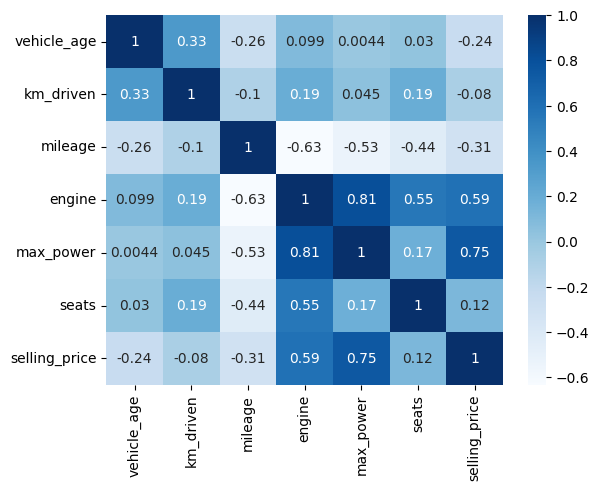

In [27]:
sns.heatmap(corr, annot=True, cmap='Blues')

#### Bivariate Visualization

<Axes: xlabel='fuel_type', ylabel='max_power'>

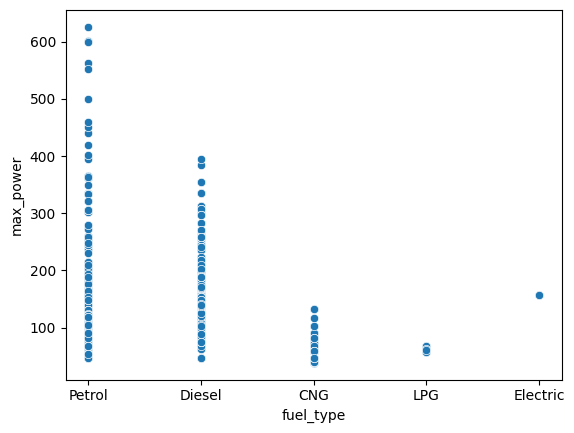

In [28]:
sns.scatterplot(data=df, x='fuel_type', y='max_power')

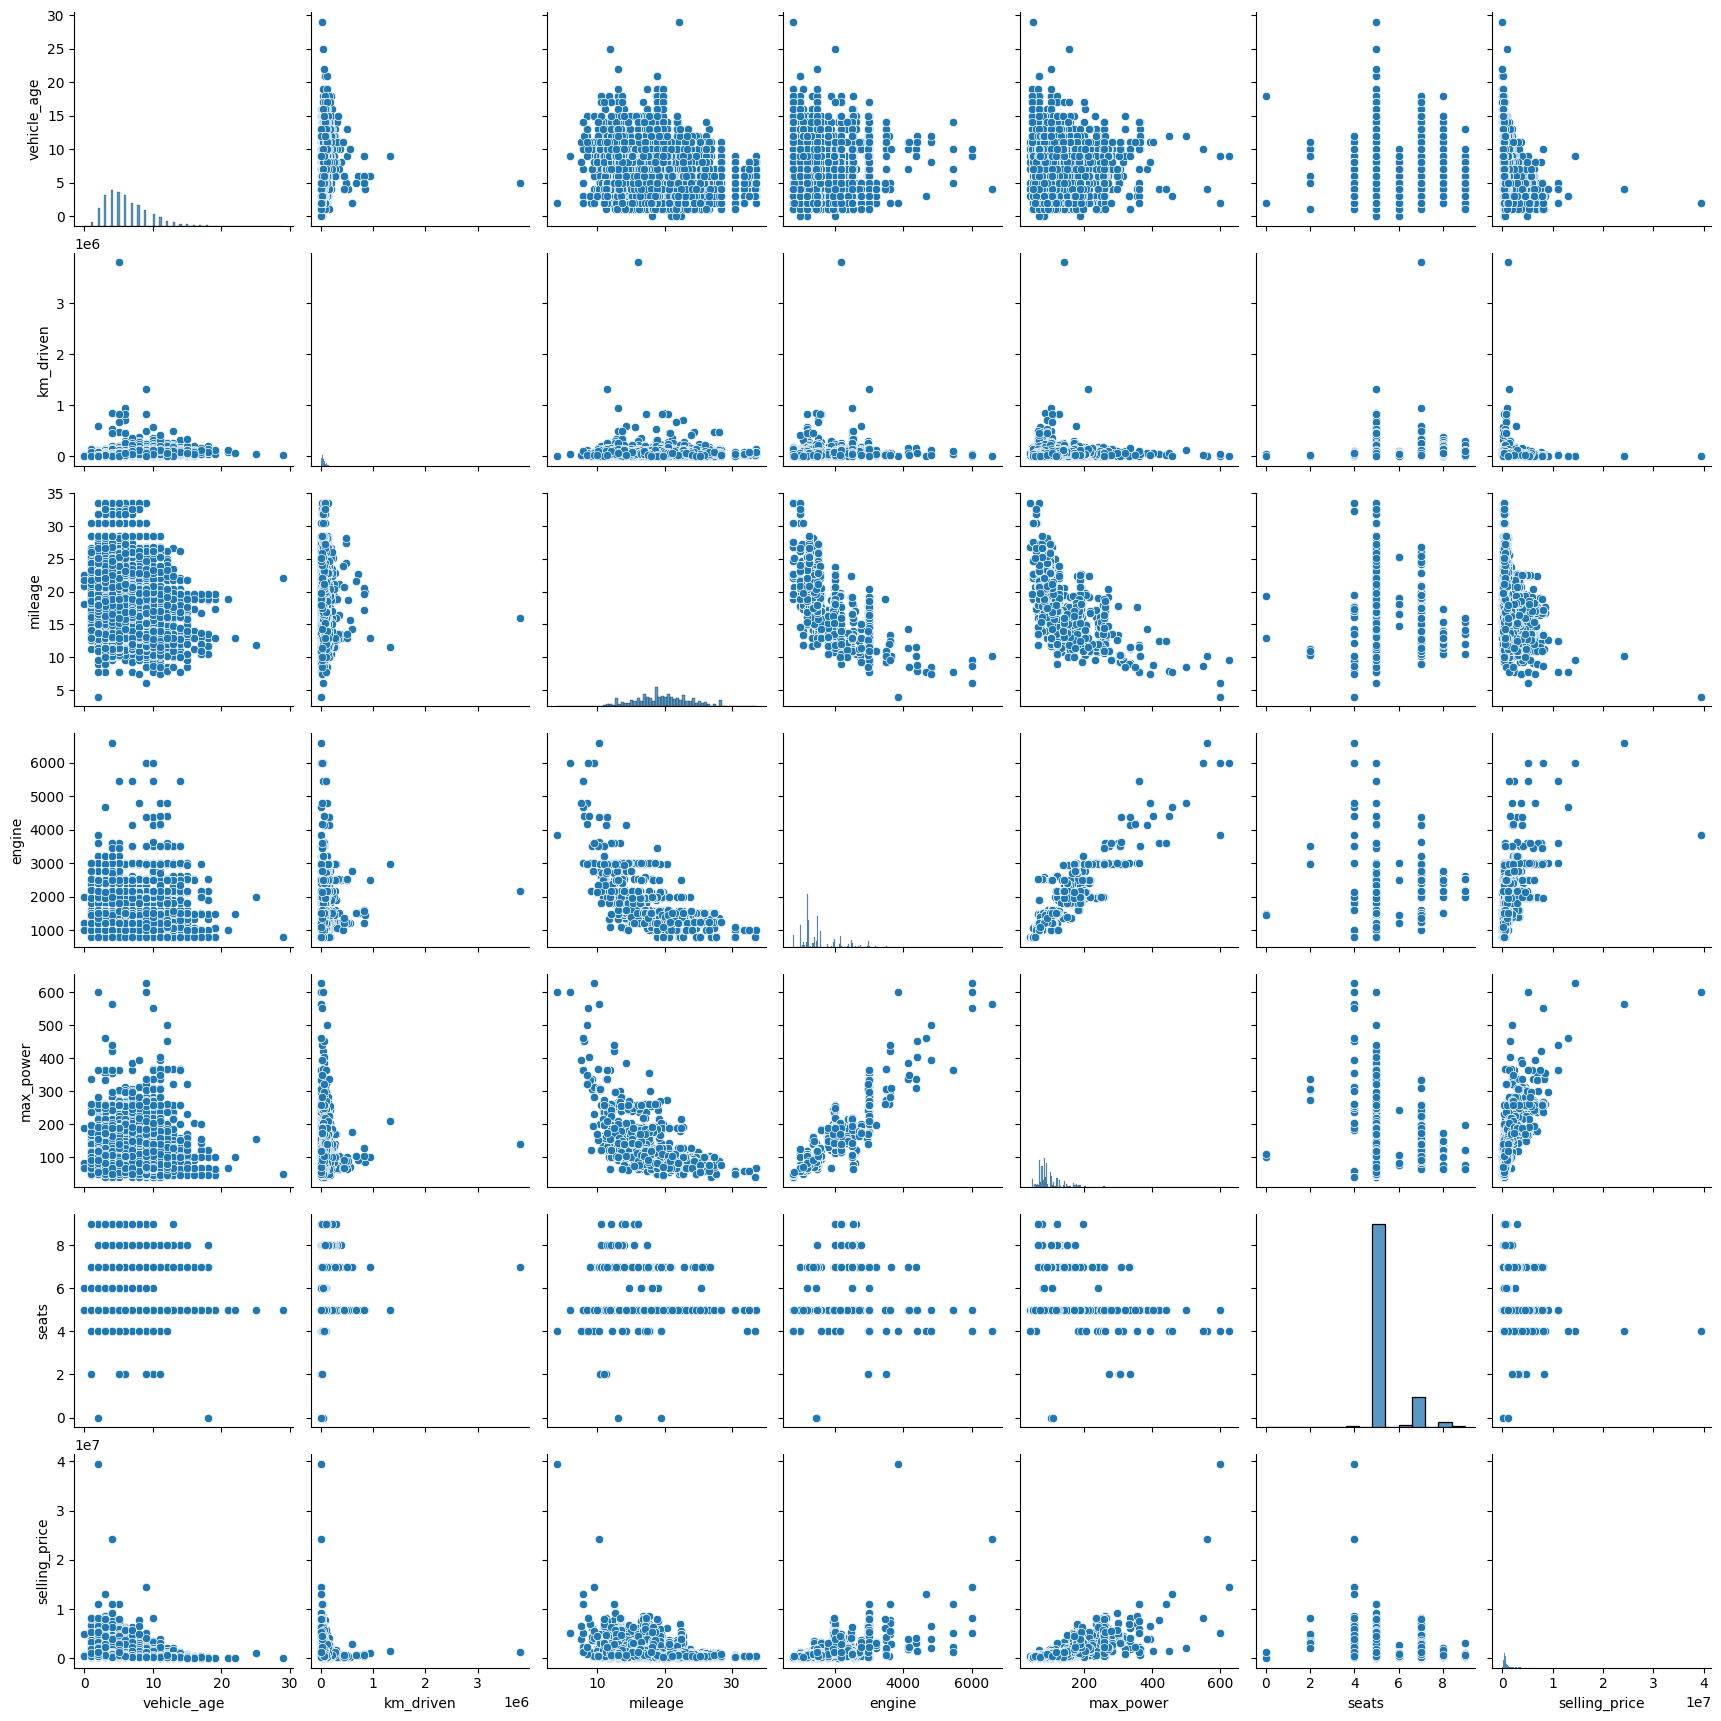

In [29]:
sns.pairplot(df)

## Feature Encoding and Scaling
**One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [30]:
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [31]:
df['model'].unique()

array(['Alto', 'Grand', 'i20', 'Ecosport', 'Wagon R', 'i10', 'Venue',
       'Swift', 'Verna', 'Duster', 'Cooper', 'Ciaz', 'C-Class', 'Innova',
       'Baleno', 'Swift Dzire', 'Vento', 'Creta', 'City', 'Bolero',
       'Fortuner', 'KWID', 'Amaze', 'Santro', 'XUV500', 'KUV100', 'Ignis',
       'RediGO', 'Scorpio', 'Marazzo', 'Aspire', 'Figo', 'Vitara',
       'Tiago', 'Polo', 'Seltos', 'Celerio', 'GO', '5', 'CR-V',
       'Endeavour', 'KUV', 'Jazz', '3', 'A4', 'Tigor', 'Ertiga', 'Safari',
       'Thar', 'Hexa', 'Rover', 'Eeco', 'A6', 'E-Class', 'Q7', 'Z4', '6',
       'XF', 'X5', 'Hector', 'Civic', 'D-Max', 'Cayenne', 'X1', 'Rapid',
       'Freestyle', 'Superb', 'Nexon', 'XUV300', 'Dzire VXI', 'S90',
       'WR-V', 'XL6', 'Triber', 'ES', 'Wrangler', 'Camry', 'Elantra',
       'Yaris', 'GL-Class', '7', 'S-Presso', 'Dzire LXI', 'Aura', 'XC',
       'Ghibli', 'Continental', 'CR', 'Kicks', 'S-Class', 'Tucson',
       'Harrier', 'X3', 'Octavia', 'Compass', 'CLS', 'redi-GO', 'Glanza',
       

In [32]:
len(df['model'].unique())

120

In [33]:
df['model'].value_counts()

,count
model,
i20,898
Swift Dzire,875
Swift,774
Alto,768
City,750
...,...
Ghibli,1
C,1
Ghost,1


**LabelEncoder** is a class in the sklearn.preprocessing module of the scikit-learn library, used to convert categorical data (usually in the form of labels) into a numerical format. It is typically used when the data consists of non-numerical labels (such as names or categories) and you need to convert them into numerical values for machine learning algorithms, which generally require numerical input.

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['model']=le.fit_transform(df['model'])

In [35]:
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,7,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,54,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,118,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,7,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,38,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [36]:
len(df['seller_type'].unique()),len(df['fuel_type'].unique()),len(df['transmission_type'].unique())

(3, 5, 2)

In [37]:
## Indpendent and dependent features
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']


**ColumnTransformer** is a class in the scikit-learn library that allows you to apply different preprocessing transformations to different subsets of the columns in a dataset. This is particularly useful when you have a dataset containing both numerical and categorical features, and you need to apply different preprocessing techniques to each type (e.g., scaling for numerical data and encoding for categorical data).

In [39]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
onehot_columns = ['seller_type','fuel_type','transmission_type']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()
encoder = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", encoder, onehot_columns),
        ("StandardScaler", scaler, num_features)

    ],remainder='passthrough'

)

In [40]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 ['seller_type', 'fuel_type',
                                  'transmission_type']),
                                ('StandardScaler', StandardScaler(),
                                 Index(['model', 'vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power',
       'seats'],
      dtype='object'))])

In [47]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((12195, 10), (3049, 10))

In [42]:
X_train

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
4857,42,5,41974,Dealer,Diesel,Manual,24.52,1248,88.50,7
6153,100,16,90000,Individual,Petrol,Manual,14.00,1061,64.00,5
1962,95,10,80000,Individual,Diesel,Manual,20.54,1598,103.60,5
17392,87,8,55572,Dealer,Petrol,Automatic,13.70,1798,157.75,5
5786,64,4,110000,Individual,Petrol,Manual,23.01,999,67.00,5
...,...,...,...,...,...,...,...,...,...,...
6605,54,3,38000,Individual,Diesel,Manual,24.00,1186,73.97,5
17194,54,3,8468,Dealer,Petrol,Manual,18.90,1197,81.86,5
6867,60,5,86000,Dealer,Diesel,Manual,13.68,2393,147.80,8
1106,78,2,10000,Individual,Petrol,Manual,22.70,799,53.64,5


In [48]:
## applying Trnsformation in training(fit_transform)
X_train=preprocessor.fit_transform(X_train)

In [50]:
## apply tansformation on test(transform)
X_test=preprocessor.transform(X_test)

In [51]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.551812,-0.347650,-0.313297,1.166383,-0.450611,-0.278238,2.093957
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.044719,3.285533,0.823151,-1.368036,-0.809634,-0.844091,-0.401480
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.907087,1.303797,0.586519,0.207544,0.221358,0.070513,-0.401480
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.686876,0.643218,0.008475,-1.440310,0.605341,1.321164,-0.401480
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.053768,-0.677940,1.296414,0.802603,-0.928669,-0.774803,-0.401480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12190,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.221496,-1.008229,-0.407334,1.041108,-0.569645,-0.613823,-0.401480
12191,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.221496,-1.008229,-1.106155,-0.187555,-0.548526,-0.431595,-0.401480
12192,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.056337,-0.347650,0.728498,-1.445128,1.747688,1.091358,3.341675
12193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.439138,-1.338519,-1.069903,0.727919,-1.312651,-1.083366,-0.401480


In [53]:
X_train

array([[ 0.        ,  0.        ,  1.        , ..., -0.4506109 ,
        -0.27823757,  2.09395698],
       [ 1.        ,  0.        ,  0.        , ..., -0.80963438,
        -0.84409074, -0.40147988],
       [ 1.        ,  0.        ,  1.        , ...,  0.22135818,
         0.07051276, -0.40147988],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  1.74768795,
         1.09135807,  3.34167541],
       [ 1.        ,  0.        ,  0.        , ..., -1.31265124,
        -1.0833658 , -0.40147988],
       [ 0.        ,  0.        ,  0.        , ..., -0.93058882,
        -0.77249299, -0.40147988]])

## Model Training And Model Selection

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.metrics import r2_score, mean_absolute_error

In [55]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    r2_square = r2_score(true, predicted)
    return mae, r2_square

راح نجرب جميع المودل للتدريب ونشوف افضل مودل نتيجه للاكيورسي ونعتمده للتدريب

In [56]:
## Beginning Model Training
models = [LinearRegression(), KNeighborsRegressor() , DecisionTreeRegressor(),RandomForestRegressor() ]


for model in models:
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(type(model).__name__)

    print('Model performance for Training set')
    print("- Mean Absolute Error:" ,model_train_mae)
    print("- R2 Score:", model_train_r2)

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Mean Absolute Error:" ,model_test_mae)
    print("- R2 Score:", model_test_r2)

    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Mean Absolute Error: 275284.3899581493
- R2 Score: 0.6224216387180522
----------------------------------
Model performance for Test set
- Mean Absolute Error: 262717.18861080665
- R2 Score: 0.6717231990253707


KNeighborsRegressor
Model performance for Training set
- Mean Absolute Error: 91454.63509635096
- R2 Score: 0.8931927462499339
----------------------------------
Model performance for Test set
- Mean Absolute Error: 112497.85995408331
- R2 Score: 0.8305031144071374


DecisionTreeRegressor
Model performance for Training set
- Mean Absolute Error: 4798.996856635234
- R2 Score: 0.9995434497991564
----------------------------------
Model performance for Test set
- Mean Absolute Error: 130756.93123428448
- R2 Score: 0.8171715426438293


RandomForestRegressor
Model performance for Training set
- Mean Absolute Error: 39861.59318700979
- R2 Score: 0.9819012258741662
----------------------------------
Model performance for Test set
- 

In [57]:
#Initialize few parameter for Hyperparamter tuning
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}


In [58]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(estimator=RandomForestRegressor(),
                                   param_distributions=rf_params,
                                   n_iter=20,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
random.fit(X_train, y_train)

print(f"---------------- Best Params -------------------")
print(random.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
---------------- Best Params -------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 5, 'max_depth': None}


In [59]:
model = RandomForestRegressor(n_estimators= 1000, min_samples_split= 2, max_features= 5, max_depth = None)
model.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate Train and Test dataset
model_train_mae , model_train_r2 = evaluate_model(y_train, y_train_pred)
model_test_mae , model_test_r2 = evaluate_model(y_test, y_test_pred)


print(type(model).__name__)

print('Model performance for Training set')
print("- Mean Absolute Error:" ,model_train_mae)
print("- R2 Score:", model_train_r2)

print('----------------------------------')

print('Model performance for Test set')
print("- Mean Absolute Error:" ,model_test_mae)
print("- R2 Score:", model_test_r2)

print('='*35)
print('\n')

RandomForestRegressor
Model performance for Training set
- Mean Absolute Error: 38853.878146330004
- R2 Score: 0.982596714454049
----------------------------------
Model performance for Test set
- Mean Absolute Error: 100399.82871895788
- R2 Score: 0.8993792788168296




In [60]:
knn_reg = KNeighborsRegressor()

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'p': [1, 2]  # Distance metric (1: Manhattan, 2: Euclidean)
}


random = RandomizedSearchCV(estimator=knn_reg, param_distributions=param_grid, n_iter=20, cv=5, random_state=42, n_jobs=-1)

random.fit(X_train, y_train)
print(f"---------------- Best Params -------------------")
print(random.best_params_)

---------------- Best Params -------------------
{'weights': 'distance', 'p': 1, 'n_neighbors': 5}


In [ ]:

dt_reg = DecisionTreeRegressor()

# Define hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf node
}


random = RandomizedSearchCV(estimator=dt_reg, param_distributions=param_grid, n_iter=20, cv=5, random_state=42, n_jobs=-1)

random.fit(X_train, y_train)
print(f"---------------- Best Params -------------------")
print(random.best_params_)

In [ ]:
from sklearn.svm import SVR
svr = SVR()

# Define hyperparameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'degree': [2, 3, 4],  # For polynomial kernel
}

random = RandomizedSearchCV(estimator=svr, param_distributions=param_grid, n_iter=20, cv=5, random_state=42, n_jobs=-1)

random.fit(X_train, y_train)
print(f"---------------- Best Params-------------------")
print(random.best_params_)